
Enter edges (format: source destination, one per line)
Example input:
A B
B C
Enter 'done' when finished

A B
A C
B D
C E
D E
D F
E G
F H
G H
done

Graph created successfully!
Enter start node: A
Enter end node: H

Searching and visualizing...


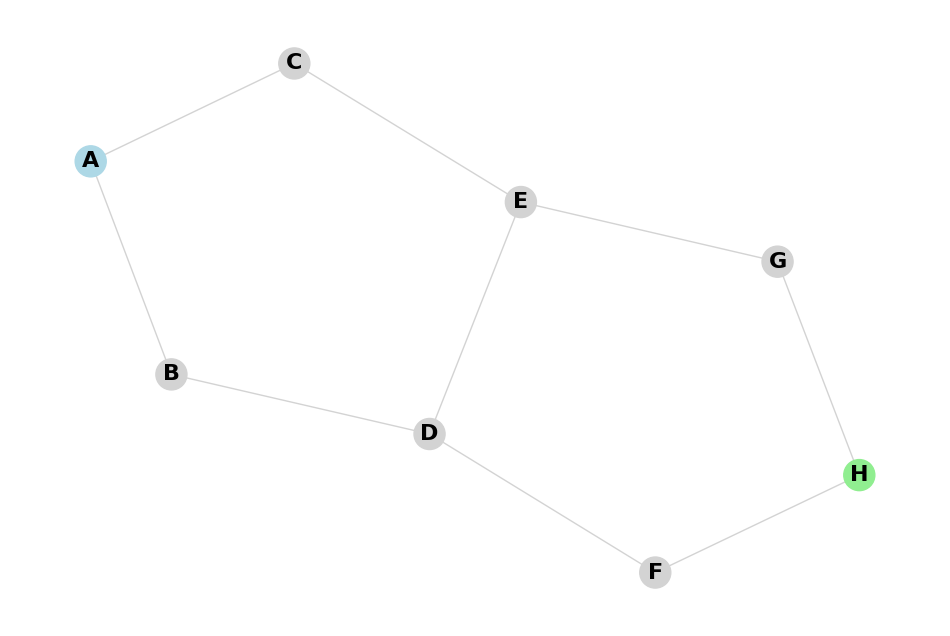


Shortest Path: ['A', 'B', 'D', 'F', 'H']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

def bi_bfs(graph, start, end, ax):
    if start == end:
        return [start]

    # Initialize color maps for visualization
    node_colors = ['lightgray'] * len(graph.nodes())
    edge_colors = ['lightgray'] * len(graph.edges())
    pos = nx.spring_layout(graph)

    # Get node indices for coloring
    node_indices = {node: idx for idx, node in enumerate(graph.nodes())}
    edge_list = list(graph.edges())

    front, back = {start}, {end}
    fq, bq = deque([start]), deque([end])
    fp, bp = {start: None}, {end: None}

    # Color initial nodes
    node_colors[node_indices[start]] = 'lightblue'
    node_colors[node_indices[end]] = 'lightgreen'
    visualize_graph(graph, pos, node_colors, edge_colors, ax)
    plt.pause(1)

    while fq and bq:
        # Forward search
        if search(graph, fq, front, fp, back, node_colors, edge_colors,
                 node_indices, edge_list, pos, ax, 'forward'):
            path = construct_path(fp, bp)
            # Color the final path
            color_path(path, graph, node_colors, edge_colors, node_indices,
                      edge_list, pos, ax)
            return path

        # Backward search
        if search(graph, bq, back, bp, front, node_colors, edge_colors,
                 node_indices, edge_list, pos, ax, 'backward'):
            path = construct_path(fp, bp)
            # Color the final path
            color_path(path, graph, node_colors, edge_colors, node_indices,
                      edge_list, pos, ax)
            return path

    return None

def search(graph, q, v, p, other_v, node_colors, edge_colors, node_indices,
           edge_list, pos, ax, direction):
    node = q.popleft()

    for nei in graph.neighbors(node):
        if nei not in v:
            v.add(nei)
            p[nei] = node
            q.append(nei)

            # Color the newly explored node and edge
            node_colors[node_indices[nei]] = 'lightblue' if direction == 'forward' else 'lightgreen'
            edge_idx = edge_list.index((node, nei)) if (node, nei) in edge_list else edge_list.index((nei, node))
            edge_colors[edge_idx] = 'lightblue' if direction == 'forward' else 'lightgreen'

            # Visualize the current state
            visualize_graph(graph, pos, node_colors, edge_colors, ax)
            plt.pause(0.5)

            if nei in other_v:
                return True
    return False

def construct_path(fp, bp):
    meet = set(fp).intersection(set(bp)).pop()
    path = []
    cur = meet
    while cur:
        path.append(cur)
        cur = fp[cur]
    path.reverse()

    cur = bp[meet]
    while cur:
        path.append(cur)
        cur = bp[cur]

    return path

def color_path(path, graph, node_colors, edge_colors, node_indices, edge_list, pos, ax):
    # Color nodes in the path
    for node in path:
        node_colors[node_indices[node]] = 'red'

    # Color edges in the path
    for i in range(len(path)-1):
        edge = (path[i], path[i+1])
        edge_idx = edge_list.index(edge) if edge in edge_list else edge_list.index((edge[1], edge[0]))
        edge_colors[edge_idx] = 'red'

    visualize_graph(graph, pos, node_colors, edge_colors, ax)
    plt.pause(1)

def visualize_graph(graph, pos, node_colors, edge_colors, ax):
    ax.clear()
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color=node_colors,
            edge_color=edge_colors, node_size=500, font_size=16,
            font_weight='bold')

if __name__ == "__main__":
    # Create figure for visualization
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create the graph
    city = nx.Graph()
    print("\nEnter edges (format: source destination, one per line)")
    print("Example input:")
    print("A B")
    print("B C")
    print("Enter 'done' when finished\n")

    try:
        while True:
            edge = input().strip()
            if edge.lower() == 'done':
                break
            source, dest = edge.split()
            city.add_edges_from([(source, dest)])

        print("\nGraph created successfully!")
        start = input("Enter start node: ").strip()
        end = input("Enter end node: ").strip()

        if start not in city.nodes() or end not in city.nodes():
            print("Error: Start or end node not in graph!")
        else:
            print("\nSearching and visualizing...")
            path = bi_bfs(city, start, end, ax)
            if path:
                print(f"\nShortest Path: {path}")
            else:
                print("\nNo path exists between the given nodes!")

            plt.show()  # Keep the final visualization window open

    except ValueError:
        print("Error: Invalid input format! Please use 'source destination' format.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")